In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import time

In [7]:
def pps(n,ND) :
    P=n*100/ND
    PP= "{:.2f}".format(P)
    print("\r",end="")
    print("processes",PP,"% completed:   ",end="")
    i=50*n/ND
    a=50-int(i)
    b=(int(i)+1)*"🟩"
    c=(a-1)*"⬜️"
    print(b,end="")
    print(c, end="")
    if n==ND:
        print("\r","computing successfully completed!   ",50*"🟦")

In [8]:
def initial_condition(I0):
    G=nx.read_gpickle('Graph.gpickle')
    for n_0 in G.nodes:
        G.nodes[n_0]['x']='s'
        G.nodes[n_0]['tpe']=[0]
        G.nodes[n_0]['tpq']=[0]
        if random.random()<I0:
            G.nodes[n_0]['x']='i'
    return G

In [9]:
def Count_nodes(Graph):
    qnode=[]
    snode=[]
    enode=[]
    inode=[]
    rnode=[]
    vnode=[]
    for n_1 in Graph.nodes:
        if Graph.nodes[n_1]['x']=='q':
            qnode.append(n_1)
        if Graph.nodes[n_1]['x']=='s':
            snode.append(n_1)
        if Graph.nodes[n_1]['x']=='e':
            enode.append(n_1)  
        if Graph.nodes[n_1]['x']=='i':
            inode.append(n_1)  
        if Graph.nodes[n_1]['x']=='r':
            rnode.append(n_1)
        if Graph.nodes[n_1]['x']=='v':
            vnode.append(n_1)
    data=[]
    data.append(len(snode)+len(qnode))
    data.append(len(snode))
    data.append(len(qnode))
    data.append(len(enode))
    data.append(len(inode))
    data.append(len(rnode))
    data.append(len(vnode))
    return (data,inode,enode,qnode)

In [10]:
#def SEIR_dynamic(G,beta,gamma,t_e,ND,Quar,P2):
def SEIR_dynamic(I0,beta,gamma,t_e,t_q,P1,P2,P3):

    G = initial_condition(I0)

    s_all=[]
    sdata=[]
    qdata=[]
    edata=[]
    idata=[]
    rdata=[]
    vdata=[]
    

    while len(rdata)<20 or rdata[-1]!=rdata[-3]:

        (data,inode,enode,qnode)= Count_nodes(Graph=G)

        s_all.append(data[0])
        sdata.append(data[1])
        qdata.append(data[2])
        edata.append(data[3])
        idata.append(data[4])
        rdata.append(data[5])
        vdata.append(data[6])

        for n_2 in G.nodes:
            if G.nodes[n_2]['x']=='s' and random.random()<P1:
                G.nodes[n_2]['x']='v'
            if G.nodes[n_2]['x']=='e':
                G.nodes[n_2]['tpe'][0]+=1
            if G.nodes[n_2]['x']=='q':
                G.nodes[n_2]['tpq'][0]+=1
        for n_3 in enode:
            if G.nodes[n_3]['tpe']>=np.random.poisson(t_e,size=1)[0]:
                G.nodes[n_3]['x']='i'
        for n_3 in qnode:
            if G.nodes[n_3]['tpq']>=np.random.poisson(t_q,size=1)[0]:
                G.nodes[n_3]['x']='s'

        for n_4 in inode:
            for n_5 in G.adj[n_4]:
                if ((G.nodes[n_5]['x']=='s') and (random.random()<P2)):
                    G.nodes[n_5]['x']='q'
        for i in G.nodes:
            if G.nodes[i]['x']=='q':
                for j in G.adj[i]:
                    if G.nodes[j]['x']=='s' and random.random()<P3/2:
                        G.nodes[j]['x']='q'

        for n_6 in inode:
            if random.random()<gamma:
                G.nodes[n_6]['x']='r'
            for n_7 in G.adj[n_6]:
                if ((G.nodes[n_7]['x']=='s') and (random.random()<beta)):
                    G.nodes[n_7]['x']='e'
                if ((G.nodes[n_7]['x']=='q') and (random.random()<beta*0.75)):
                    G.nodes[n_7]['x']='e'

    RES=[s_all,edata,idata,rdata,vdata,sdata,qdata]
    return RES

In [11]:
a=time.time()
data=SEIR_dynamic(I0= 0.02,beta= 0.6,gamma= 0.1,t_e= 5,t_q= 6,P1= 0.015,P2= 0.5, P3=0.5)
b=time.time()
b-a

0.4059925079345703

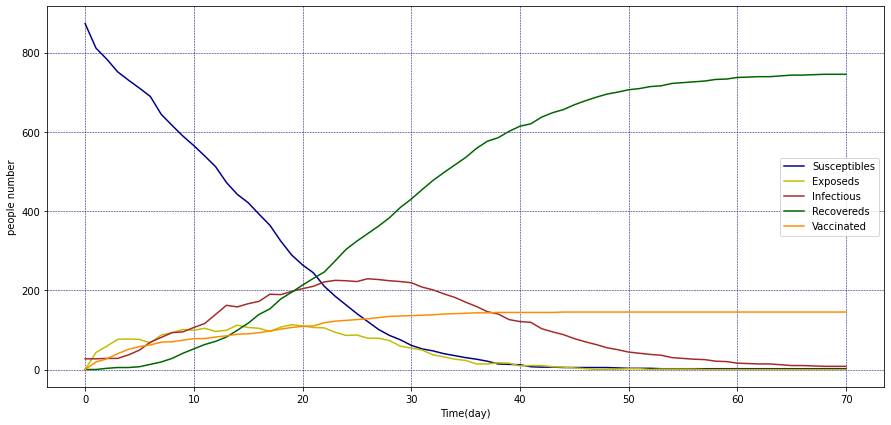

In [12]:
plt.figure(figsize=(15,7))
plt.plot(data[0], 'darkblue', label='Susceptibles')
plt.plot(data[1],'y', label='Exposeds')
plt.plot(data[2],'brown', label='Infectious')
plt.plot(data[3], 'darkgreen', label='Recovereds')
plt.plot(data[4], 'darkorange', label='Vaccinated')
plt.legend(loc=0)
plt.xlabel('Time(day)')
plt.ylabel('people number')
plt.grid(color = 'navy', linestyle = '--', linewidth = 0.5)
plt.savefig('SEIR-Network')
plt.show()

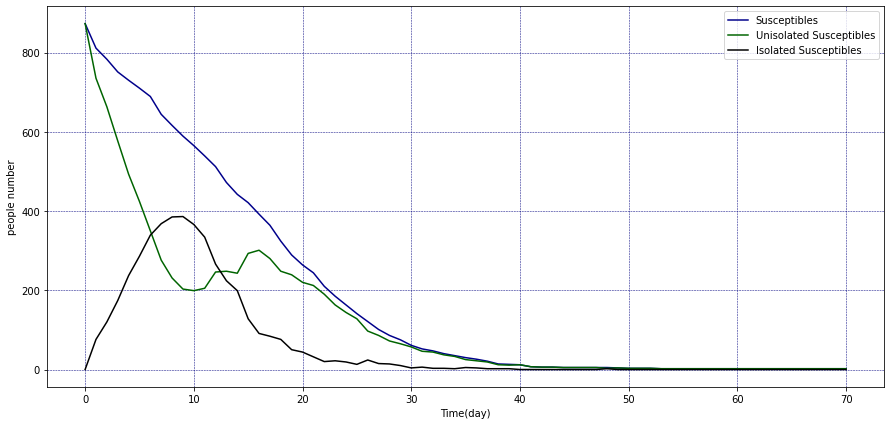

In [13]:
plt.figure(figsize=(15,7))
plt.plot(data[0], 'darkblue', label='Susceptibles')
plt.plot(data[5], 'darkgreen', label='Unisolated Susceptibles')
plt.plot(data[6], 'k', label='Isolated Susceptibles')
plt.legend(loc=0)
plt.xlabel('Time(day)')
plt.ylabel('people number')
plt.grid(color = 'navy', linestyle = '--', linewidth = 0.5)
plt.savefig('SEIR-Network')
plt.show()